<a href="https://colab.research.google.com/github/PaulToronto/DataCamp_TimeSeries/blob/main/01_Working_with_Time_Series_in_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Working with Time Series in Pandas

This chapter lays the foundations to leverage the powerful time series functionality made available by how Pandas represents dates, in particular by the DateTimeIndex. You will learn how to create and manipulate date information and time series, and how to do calculations with time-aware DataFrames to shift your data in time or create period-specific returns.

## Imports and `data_path`

In [1]:
data_path = 'https://raw.githubusercontent.com/PaulToronto/'
data_path += 'DataCamp_TimeSeries/main/stock_data/'

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from datetime import datetime

## How to use dates & times with pandas

### `pd.Timestamp`

In [3]:
date_time = datetime(2017, 1, 1)
type(date_time), date_time

(datetime.datetime, datetime.datetime(2017, 1, 1, 0, 0))

In [6]:
time_stamp = pd.Timestamp(date_time)
type(time_stamp), time_stamp

(pandas._libs.tslibs.timestamps.Timestamp, Timestamp('2017-01-01 00:00:00'))

In [7]:
pd.Timestamp('2017-04-03')

Timestamp('2017-04-03 00:00:00')

In [8]:
time_stamp.year, time_stamp.day_name(), time_stamp.dayofweek

(2017, 'Sunday', 6)

### `pd.Period`

In [9]:
period = pd.Period(value='2017-01') # default freq is 'M'

In [10]:
period

Period('2017-01', 'M')

In [11]:
period.asfreq('D')

Period('2017-01-31', 'D')

In [12]:
period.to_timestamp()

Timestamp('2017-01-01 00:00:00')

In [13]:
period.to_timestamp().to_period('M')

Period('2017-01', 'M')

In [14]:
period, period + 2

(Period('2017-01', 'M'), Period('2017-03', 'M'))

In [15]:
pd.Timestamp('2017-01-31') + pd.Timedelta(1, unit='D')

Timestamp('2017-02-01 00:00:00')

### `pd.date_range`

In [17]:
index = pd.date_range(start='2017-1-1', periods=12, freq='M')
index

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M')

In [18]:
index.to_period()

PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
            dtype='period[M]')

In [19]:
index.dtype, index.to_period().dtype

(dtype('<M8[ns]'), period[M])

In [20]:
pd.DataFrame({'data': index}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    12 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 224.0 bytes


In [21]:
pd.DataFrame({'data': index})

,data
0,2017-01-31
1,2017-02-28
2,2017-03-31
3,2017-04-30
4,2017-05-31
5,2017-06-30
6,2017-07-31
7,2017-08-31
8,2017-09-30
9,2017-10-31


In [22]:
data = np.random.random(size=(12,2))
data

array([[0.64483831, 0.84826157],
       [0.18210519, 0.09593169],
       [0.7768443 , 0.55256973],
       [0.39637863, 0.16827219],
       [0.03704703, 0.44796577],
       [0.26235356, 0.34210417],
       [0.24103067, 0.31077478],
       [0.08842765, 0.48259668],
       [0.01006376, 0.24043485],
       [0.89027417, 0.55823392],
       [0.23834751, 0.44012168],
       [0.37367459, 0.59797098]])

In [23]:
pd.DataFrame(data=data, index=index).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2017-01-31 to 2017-12-31
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12 non-null     float64
 1   1       12 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes


In [24]:
pd.DataFrame(data=data, index=index)

,0,1
2017-01-31,0.644838,0.848262
2017-02-28,0.182105,0.095932
2017-03-31,0.776844,0.552570
2017-04-30,0.396379,0.168272
2017-05-31,0.037047,0.447966
2017-06-30,0.262354,0.342104
2017-07-31,0.241031,0.310775
2017-08-31,0.088428,0.482597
2017-09-30,0.010064,0.240435
2017-10-31,0.890274,0.558234


### Frequency aliases

- H: Hour
- D: Day
- W: Week
- M: Month
- Q: Quarter
- Y: Year

### Timestamp attributes

- .second, .minute, .hour
- .day, .month, .quarter, .year
- .weekday
- .dayofweek
- .weekofyear
- .dayofyear

### Exercises

In [27]:
# Create the range of dates here
seven_days = pd.date_range(start='2017-01-01', periods=7)
seven_days

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07'],
              dtype='datetime64[ns]', freq='D')

In [28]:
for day in seven_days:
    print(day.dayofweek, day.day_name())

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


## Indexing & resampling time series

In [35]:
google = pd.read_csv(data_path + 'goog_fb.csv')
google = google[['date', 'GOOG']]
google.columns = ['date', 'price']
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    504 non-null    object 
 1   price   504 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.0+ KB


In [36]:
# convert date column, which is an object to datatime64[ns]
google['date'] = pd.to_datetime(google['date'])
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    504 non-null    datetime64[ns]
 1   price   504 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.0 KB


In [37]:
google.set_index('date', inplace=True)
google.head()

,price
date,
2015-01-02,524.81
2015-01-05,513.87
2015-01-06,501.96
2015-01-07,501.10
2015-01-08,502.68


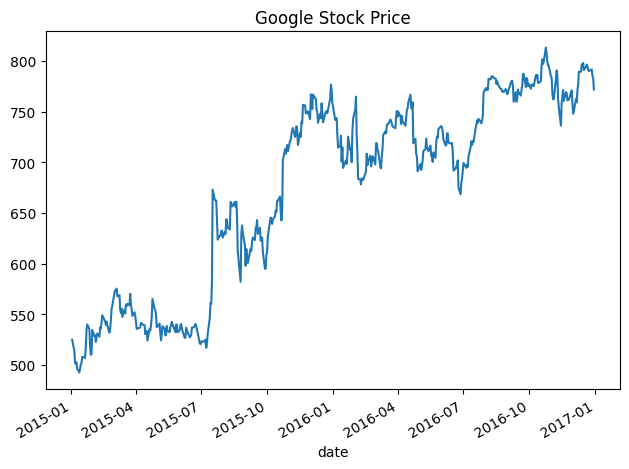

In [33]:
google['price'].plot(title='Google Stock Price')
plt.tight_layout()
plt.show()

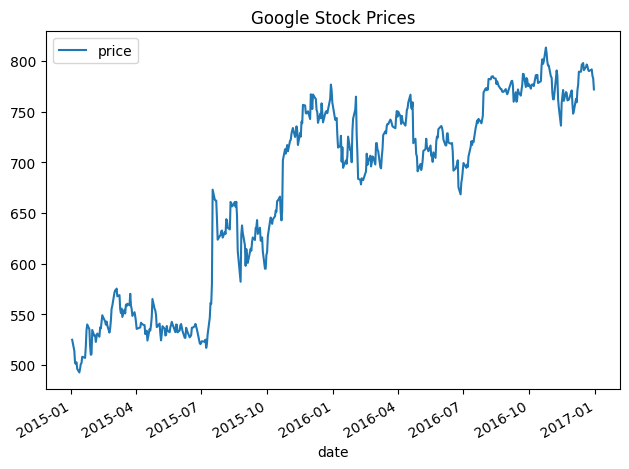

In [40]:
google.plot(title='Google Stock Prices')
plt.tight_layout()
plt.show()

### Partial string indexing

In [42]:
google.loc['2015']

,price
date,
2015-01-02,524.81
2015-01-05,513.87
2015-01-06,501.96
2015-01-07,501.10
2015-01-08,502.68
...,...
2015-12-24,748.40
2015-12-28,762.51
2015-12-29,776.60


In [43]:
google.loc['2015'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-01-02 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [44]:
google.loc['2015':'2016'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   504 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


In [45]:
google['2015':'2016'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   504 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


In [46]:
google['2015-3':'2016-2']

,price
date,
2015-03-02,571.34
2015-03-03,573.64
2015-03-04,573.37
2015-03-05,575.33
2015-03-06,567.68
...,...
2016-02-23,695.85
2016-02-24,699.56
2016-02-25,705.75


In [49]:
google.loc['2016',['price']]

,price
date,
2016-01-04,741.84
2016-01-05,742.58
2016-01-06,743.62
2016-01-07,726.39
2016-01-08,714.47
...,...
2016-12-23,789.91
2016-12-27,791.55
2016-12-28,785.05


In [50]:
google.loc['2016-6-1','price']

734.15

### `.asfreq()`: set frequency

- **Upsampling**
  - higher freqeuncy than the origianl version
  - implies missing data

In [51]:
google.head(12)

,price
date,
2015-01-02,524.81
2015-01-05,513.87
2015-01-06,501.96
2015-01-07,501.10
2015-01-08,502.68
2015-01-09,496.17
2015-01-12,492.55
2015-01-13,496.18
2015-01-14,500.87


In [52]:
# note there is no frequency information
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   504 non-null    float64
dtypes: float64(1)
memory usage: 24.0 KB


In [53]:
google.asfreq('D').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 729 entries, 2015-01-02 to 2016-12-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   504 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


In [54]:
# this is an example of upsampling
google.asfreq('D').head(12) # calendar day frequency

,price
date,
2015-01-02,524.81
2015-01-03,NaN
2015-01-04,NaN
2015-01-05,513.87
2015-01-06,501.96
2015-01-07,501.10
2015-01-08,502.68
2015-01-09,496.17
2015-01-10,NaN


In [55]:
# business day frequency
google = google.asfreq('B')
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 521 entries, 2015-01-02 to 2016-12-30
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   504 non-null    float64
dtypes: float64(1)
memory usage: 8.1 KB


In [60]:
# business days with null values for price
google[google['price'].isnull()]

,price
date,
2015-01-19,NaN
2015-02-16,NaN
2015-04-03,NaN
2015-05-25,NaN
2015-07-03,NaN
2015-09-07,NaN
2015-11-26,NaN
2015-12-25,NaN
2016-01-01,NaN


### Exercises

In [61]:
file_path = 'https://raw.githubusercontent.com/PaulToronto/DataCamp_TimeSeries/main/'
file_path += 'air_quality_data/nyc.csv'

In [62]:
data = pd.read_csv(file_path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB


In [65]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    6317 non-null   datetime64[ns]
 1   ozone   6317 non-null   float64       
 2   pm25    6317 non-null   float64       
 3   co      6317 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 197.5 KB


In [66]:
data.set_index('date', inplace=True)
data.head()

,ozone,pm25,co
date,,,
1999-07-01,0.012024,20.000000,1.300686
1999-07-02,0.027699,23.900000,0.958194
1999-07-03,0.043969,36.700000,1.194444
1999-07-04,0.035161,39.000000,1.081548
1999-07-05,0.038359,28.171429,0.939583


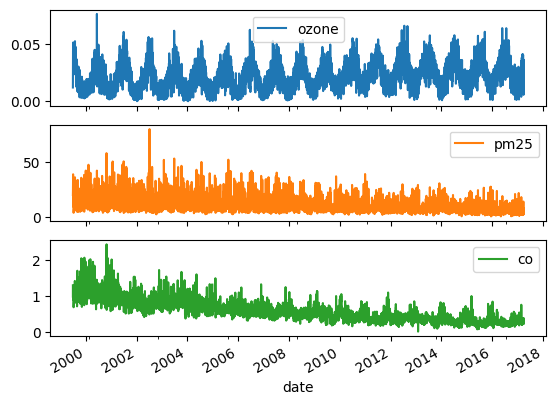

In [67]:
data.plot(subplots=True);

In [71]:
yahoo = pd.read_csv(data_path + 'yahoo.csv', parse_dates=['date'], index_col='date')
yahoo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2013-01-02 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   756 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB


In [78]:
prices = pd.DataFrame()
prices

""


In [79]:
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

prices

,2013,2014,2015
0,20.08,NaN,NaN
1,19.78,39.59,50.17
2,19.86,40.12,49.13
3,19.40,39.93,49.21
4,19.66,40.92,48.59
...,...,...,...
256,40.65,NaN,NaN
257,40.49,50.86,33.60
258,40.20,50.53,34.04
259,40.44,51.22,33.37


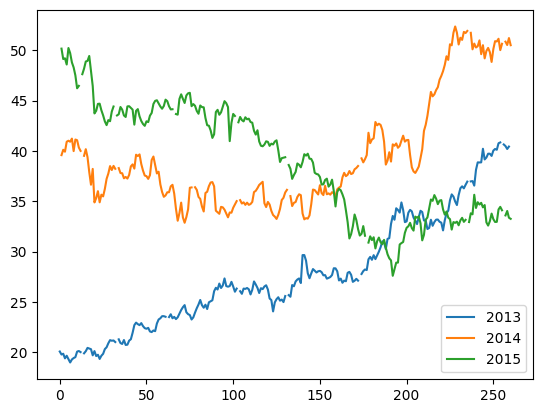

In [80]:
prices.plot()
plt.show()

## Lags, changes, and returns for stock price series

- Typical Time Series manipulations include:
  - Shift or lag values back or forward in time
  - Get the difference in value for a given time period
  - Compute the percentage change over any number of periods

In [ ]:
pd.read_csv(data_path + 'goog_fb.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    504 non-null    object 
 1   FB      504 non-null    float64
 2   GOOG    504 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.9+ KB


In [ ]:
pd.read_csv(data_path + 'goog_fb.csv', parse_dates=['date']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    504 non-null    datetime64[ns]
 1   FB      504 non-null    float64       
 2   GOOG    504 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 11.9 KB


In [ ]:
pd.read_csv(data_path + 'goog_fb.csv', parse_dates=['date'], index_col='date').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FB      504 non-null    float64
 1   GOOG    504 non-null    float64
dtypes: float64(2)
memory usage: 11.8 KB


In [ ]:
google = pd.read_csv(data_path + 'goog_fb.csv', parse_dates=['date'], index_col='date')
google = google[['GOOG']]
google.columns = ['price']
google.head()

,price
date,
2015-01-02,524.81
2015-01-05,513.87
2015-01-06,501.96
2015-01-07,501.10
2015-01-08,502.68


### `.shift()`

In [ ]:
google['shifted'] = google['price'].shift() # default: periods=1
google['lagged'] = google['price'].shift(-1)

In [ ]:
google.head()

,price,shifted,lagged
date,,,
2015-01-02,524.81,NaN,513.87
2015-01-05,513.87,524.81,501.96
2015-01-06,501.96,513.87,501.10
2015-01-07,501.10,501.96,502.68
2015-01-08,502.68,501.10,496.17


In [ ]:
google.tail()

,price,shifted,lagged
date,,,
2016-12-23,789.91,791.26,791.55
2016-12-27,791.55,789.91,785.05
2016-12-28,785.05,791.55,782.79
2016-12-29,782.79,785.05,771.82
2016-12-30,771.82,782.79,NaN


### Calculate one-period percent change

- this is called **financial return** in finance

$$
\frac{x_t}{x_{t-1}}
$$

In [ ]:
google['change'] = google['price'].div(google['shifted'])
google.head()

,price,shifted,lagged,change
date,,,,
2015-01-02,524.81,NaN,513.87,NaN
2015-01-05,513.87,524.81,501.96,0.979154
2015-01-06,501.96,513.87,501.10,0.976823
2015-01-07,501.10,501.96,502.68,0.998287
2015-01-08,502.68,501.10,496.17,1.003153


In [ ]:
google['return'] = google['change'].sub(1).mul(100)
google.head()

,price,shifted,lagged,change,return
date,,,,,
2015-01-02,524.81,NaN,513.87,NaN,NaN
2015-01-05,513.87,524.81,501.96,0.979154,-2.084564
2015-01-06,501.96,513.87,501.10,0.976823,-2.317707
2015-01-07,501.10,501.96,502.68,0.998287,-0.171328
2015-01-08,502.68,501.10,496.17,1.003153,0.315306


### `.diff()`

- Difference in value for two adjacent periods
- also has periods where default is 1

$$
x_t - x_{t-1}
$$

In [ ]:
google['diff'] = google['price'].diff()
google.head()

,price,shifted,lagged,change,return,diff
date,,,,,,
2015-01-02,524.81,NaN,513.87,NaN,NaN,NaN
2015-01-05,513.87,524.81,501.96,0.979154,-2.084564,-10.94
2015-01-06,501.96,513.87,501.10,0.976823,-2.317707,-11.91
2015-01-07,501.10,501.96,502.68,0.998287,-0.171328,-0.86
2015-01-08,502.68,501.10,496.17,1.003153,0.315306,1.58


### `.pct_change()`

- calculates the percent change directly

$$
\frac{x_t}{x_{t-1}}
$$

In [ ]:
google['pct_change'] = google['price'].pct_change().mul(100)
google.head()

,price,shifted,lagged,change,return,diff,pct_change
date,,,,,,,
2015-01-02,524.81,NaN,513.87,NaN,NaN,NaN,NaN
2015-01-05,513.87,524.81,501.96,0.979154,-2.084564,-10.94,-2.084564
2015-01-06,501.96,513.87,501.10,0.976823,-2.317707,-11.91,-2.317707
2015-01-07,501.10,501.96,502.68,0.998287,-0.171328,-0.86,-0.171328
2015-01-08,502.68,501.10,496.17,1.003153,0.315306,1.58,0.315306
